# Exploring Weather Trends

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#data">Data</a></li>
<li><a href="#assesment">Data Assesment</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#visualization">Data Visualization</a></li>
<li><a href="#analysis">Data Analysis</a></li>
</ul>

<a id='intro'></a>
## Introduction

I used Jupyter Notebook, Python, and the libraries; Pandas, PyLab and MatPlotLib.

<a id='data'></a>
## Data

The following SQL queries were used on the database to extract the global data, as well as the GCC countries (Riyadh, Abu Dhabi, Manama, Doha). A .CSV file was downloaded for each query result.

* Global

SELECT * FROM global_data;

* Riyadh

SELECT year, avg_temp FROM city_data WHERE city = 'Riyadh';

* Abu Dhabi

SELECT year, avg_temp FROM city_data WHERE city = 'Abu Dhabi';

* Manama

SELECT year, avg_temp FROM city_data WHERE city = 'Manama';

* Doha

SELECT year, avg_temp FROM city_data WHERE city = 'Doha';

Using Pandas to create dataframes for each data file to easily manipulate it.

In [1]:
import csv
import pandas as pd

#read csv file
RiyadhData = pd.read_csv("Data/riyadh_data.csv")
ManamaData = pd.read_csv("Data/manama_data.csv")
AbuDhabiData = pd.read_csv("Data/abu_dhabi_data.csv")
DohaData = pd.read_csv("Data/doha_data.csv")
GlobalData = pd.read_csv("Data/global_data.csv")

#create data frames
RiyadhDF = pd.DataFrame(RiyadhData)
ManamaDF = pd.DataFrame(ManamaData)
AbuDhabiDF = pd.DataFrame(AbuDhabiData)
DohaDF = pd.DataFrame(DohaData)
GlobalDF = pd.DataFrame(GlobalData)

<a id='assesment'></a>
## Data Assesment
### 1. Global

In [3]:
GlobalDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 2 columns):
year        171 non-null int64
avg_temp    171 non-null float64
dtypes: float64(1), int64(1)
memory usage: 2.8 KB


In [4]:
#display the first few rows of a dataframe
GlobalDF.head(3)

,year,avg_temp
0,1843,8.17
1,1844,7.65
2,1845,7.85


### 2. Riyadh, Saudi Arabia

In [5]:
RiyadhDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 2 columns):
year        171 non-null int64
avg_temp    169 non-null float64
dtypes: float64(1), int64(1)
memory usage: 2.8 KB


In [6]:
RiyadhDF.head(3)

,year,avg_temp
0,1843,24.74
1,1844,15.45
2,1845,20.82


### 3. Abu Dhabi, United Emirates

In [7]:
AbuDhabiDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 2 columns):
year        171 non-null int64
avg_temp    159 non-null float64
dtypes: float64(1), int64(1)
memory usage: 2.8 KB


In [8]:
AbuDhabiDF.head(3)

,year,avg_temp
0,1843,26.04
1,1844,26.26
2,1845,NaN


### 4. Manama, Bahrain

In [9]:
ManamaDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 2 columns):
year        171 non-null int64
avg_temp    169 non-null float64
dtypes: float64(1), int64(1)
memory usage: 2.8 KB


In [10]:
ManamaDF.head(3)

,year,avg_temp
0,1843,25.26
1,1844,25.71
2,1845,21.18


### 5. Doha, Qatar

In [11]:
DohaDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 2 columns):
year        171 non-null int64
avg_temp    167 non-null float64
dtypes: float64(1), int64(1)
memory usage: 2.8 KB


In [12]:
DohaDF.head(3)

,year,avg_temp
0,1843,26.32
1,1844,18.74
2,1845,22.36


<a id='cleaning'></a>
## Data Cleaning
### 1. Filling the missing data with the mean value

I checked for missing values in the data in the previous step using Pandas info(). Riyadh, Abu Dhabi, Manama, and Doha had missing temperature values. Thus, for each city, I’ve filled the missing cells with the mean value.

In [13]:
mean = RiyadhDF['avg_temp'].mean()
RiyadhDF['avg_temp'] = RiyadhDF['avg_temp'].fillna(mean)
RiyadhDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 2 columns):
year        171 non-null int64
avg_temp    171 non-null float64
dtypes: float64(1), int64(1)
memory usage: 2.8 KB


In [14]:
mean = AbuDhabiDF['avg_temp'].mean()
AbuDhabiDF['avg_temp'] = AbuDhabiDF['avg_temp'].fillna(mean)
AbuDhabiDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 2 columns):
year        171 non-null int64
avg_temp    171 non-null float64
dtypes: float64(1), int64(1)
memory usage: 2.8 KB


In [15]:
mean = ManamaDF['avg_temp'].mean()
ManamaDF['avg_temp'] = ManamaDF['avg_temp'].fillna(mean)
ManamaDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 2 columns):
year        171 non-null int64
avg_temp    171 non-null float64
dtypes: float64(1), int64(1)
memory usage: 2.8 KB


In [16]:
mean = DohaDF['avg_temp'].mean()
DohaDF['avg_temp'] = DohaDF['avg_temp'].fillna(mean)
DohaDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 2 columns):
year        171 non-null int64
avg_temp    171 non-null float64
dtypes: float64(1), int64(1)
memory usage: 2.8 KB


### 2. Checking for duplicate data

I've also checked for duplicate data by using Pandas as shown below. However, there were no duplicates found in any of the dataframes.

In [17]:
sum(GlobalDF.duplicated())
sum(RiyadhDF.duplicated())
sum(AbuDhabiDF.duplicated())
sum(ManamaDF.duplicated())
sum(DohaDF.duplicated())

0

The registered temperatures in all cities were between 1843 and 2013. Thus, only this period was studied in the global data.

<a id='visualization'></a>
## Data Visualization
### 1. Plotting the Average Temparature

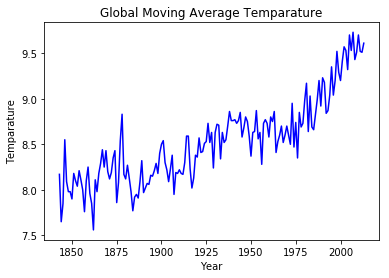

In [18]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.figure()
    
plt.plot(GlobalDF.year, GlobalDF.avg_temp, color='b')

plt.title('Global Moving Average Temparature')
plt.xlabel('Year')
plt.ylabel('Temparature')

plt.show()

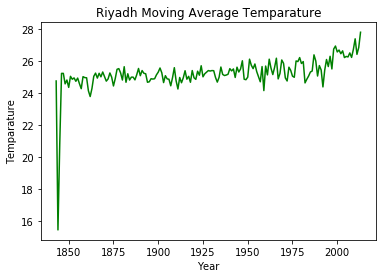

In [19]:
plt.figure()
    
plt.plot(RiyadhDF.year, RiyadhDF.avg_temp, color='g')

plt.title('Riyadh Moving Average Temparature')
plt.xlabel('Year')
plt.ylabel('Temparature')

plt.show()

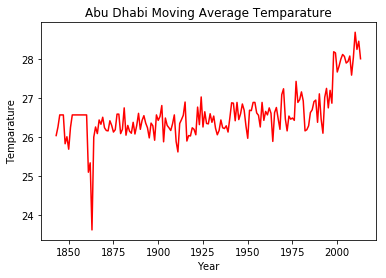

In [20]:
plt.figure()
    
plt.plot(AbuDhabiDF.year, AbuDhabiDF.avg_temp, color='r')

plt.title('Abu Dhabi Moving Average Temparature')
plt.xlabel('Year')
plt.ylabel('Temparature')

plt.show()

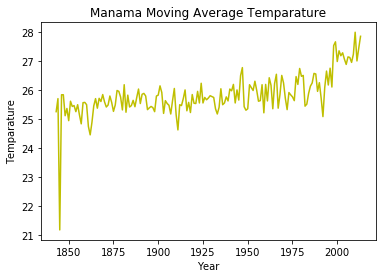

In [21]:
plt.figure()
    
plt.plot(ManamaDF.year, ManamaDF.avg_temp, color='y')

plt.title('Manama Moving Average Temparature')
plt.xlabel('Year')
plt.ylabel('Temparature')

plt.show()

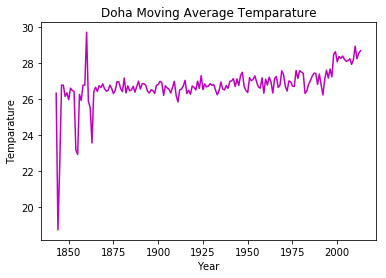

In [22]:
plt.figure()
    
plt.plot(DohaDF.year, DohaDF.avg_temp, color='m')

plt.title('Doha Moving Average Temparature')
plt.xlabel('Year')
plt.ylabel('Temparature')

plt.show()

### 2. Calculating the Moving Average

The moving average was calculated for each data frame by rolling 10 years, and calculating the mean for the avg_temp, and storing it in a new column called mov_avg_temp, as shown below.

In [23]:
GlobalDF['mov_avg_temp'] = GlobalDF.avg_temp.rolling(10).mean()
RiyadhDF['mov_avg_temp'] = RiyadhDF.avg_temp.rolling(10).mean()
AbuDhabiDF['mov_avg_temp'] = AbuDhabiDF.avg_temp.rolling(10).mean()
ManamaDF['mov_avg_temp'] = ManamaDF.avg_temp.rolling(10).mean()
DohaDF['mov_avg_temp'] = DohaDF.avg_temp.rolling(10).mean()

In [24]:
GlobalDF.head(20)

,year,avg_temp,mov_avg_temp
0,1843,8.17,NaN
1,1844,7.65,NaN
2,1845,7.85,NaN
3,1846,8.55,NaN
4,1847,8.09,NaN
5,1848,7.98,NaN
6,1849,7.98,NaN
7,1850,7.90,NaN
8,1851,8.18,NaN
9,1852,8.10,8.045


### 3. Plotting the Moving Average Temparature

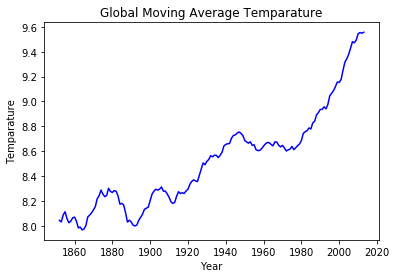

In [25]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.figure()
    
plt.plot(GlobalDF.year, GlobalDF.mov_avg_temp, color='b')

plt.title('Global Moving Average Temparature')
plt.xlabel('Year')
plt.ylabel('Temparature')

plt.show()

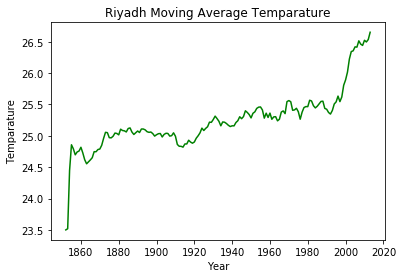

In [26]:
plt.figure()
    
plt.plot(RiyadhDF.year, RiyadhDF.mov_avg_temp, color='g')

plt.title('Riyadh Moving Average Temparature')
plt.xlabel('Year')
plt.ylabel('Temparature')

plt.show()

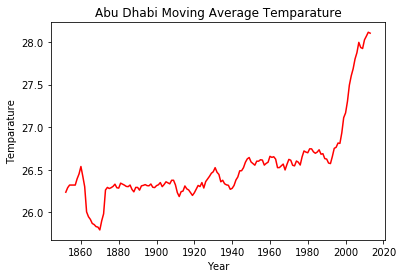

In [27]:
plt.figure()
    
plt.plot(AbuDhabiDF.year, AbuDhabiDF.mov_avg_temp, color='r')

plt.title('Abu Dhabi Moving Average Temparature')
plt.xlabel('Year')
plt.ylabel('Temparature')

plt.show()

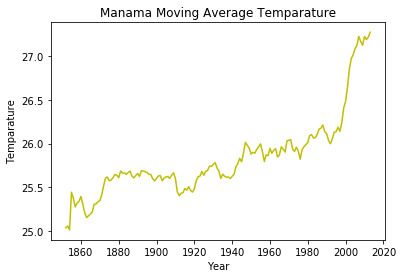

In [28]:
plt.figure()
    
plt.plot(ManamaDF.year, ManamaDF.mov_avg_temp, color='y')

plt.title('Manama Moving Average Temparature')
plt.xlabel('Year')
plt.ylabel('Temparature')

plt.show()

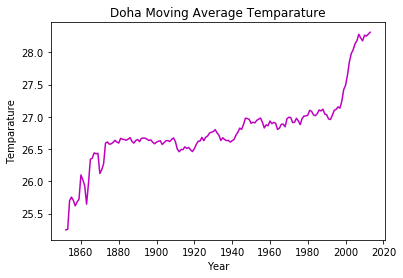

In [29]:
plt.figure()
    
plt.plot(DohaDF.year, DohaDF.mov_avg_temp, color='m')

plt.title('Doha Moving Average Temparature')
plt.xlabel('Year')
plt.ylabel('Temparature')

plt.show()

<a id='analysis'></a>
## Data Analysis

1. The **global** average temparature is between 7.97 and 9.56.
2. On the other hand, in the geographically adjacent countries' capitals **Riyadh, Abu Dhabi, Manama,** and **Doha** it's at minimum 23.50 and maximum 28.31.
3. The hottest city is **Doha**, and the least hot is **Riyadh**. However, before 1864 **Abu Dhabi** was hotter than **Doha**.
4. Over time, these cities remian hotter on average compared to the global average.
5. The average temparature of both these cities and the globe, continue to rise over time, i.e. the world is getting hotter.

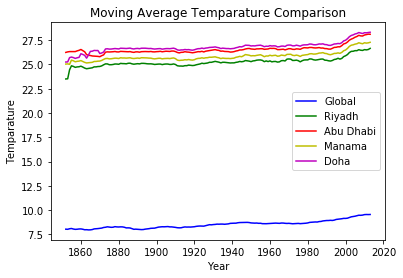

In [32]:
plt.figure()

plt.plot(GlobalDF.year, GlobalDF.mov_avg_temp, color='b', label='Global')
plt.plot(RiyadhDF.year, RiyadhDF.mov_avg_temp, color='g', label='Riyadh')
plt.plot(AbuDhabiDF.year, AbuDhabiDF.mov_avg_temp, color='r', label='Abu Dhabi')
plt.plot(ManamaDF.year, ManamaDF.mov_avg_temp, color='y', label='Manama')
plt.plot(DohaDF.year, DohaDF.mov_avg_temp, color='m', label='Doha')

plt.title('Moving Average Temparature Comparison')
plt.xlabel('Year')
plt.ylabel('Temparature')
plt.legend(loc='center right')

plt.show()

In [60]:
GlobalDF.mov_avg_temp.max()

9.5560000000000045

In [61]:
RiyadhDF.mov_avg_temp.min()

23.501828402366861

In [62]:
DohaDF.mov_avg_temp.max()

28.310999999999996